In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
df = pd.read_csv('dailyActivity.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [121]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 457
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes       

<h1>Feature Extraction</h1>

In [122]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'],format='mixed')
df['day'] = df['ActivityDate'].dt.day_name()
df.drop(['ActivityDate','Id'], axis=1, inplace=True)

In [123]:
df.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day
0,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday
1,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday
2,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday
3,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday
4,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday


<h1>Correlation</h1>

<Axes: >

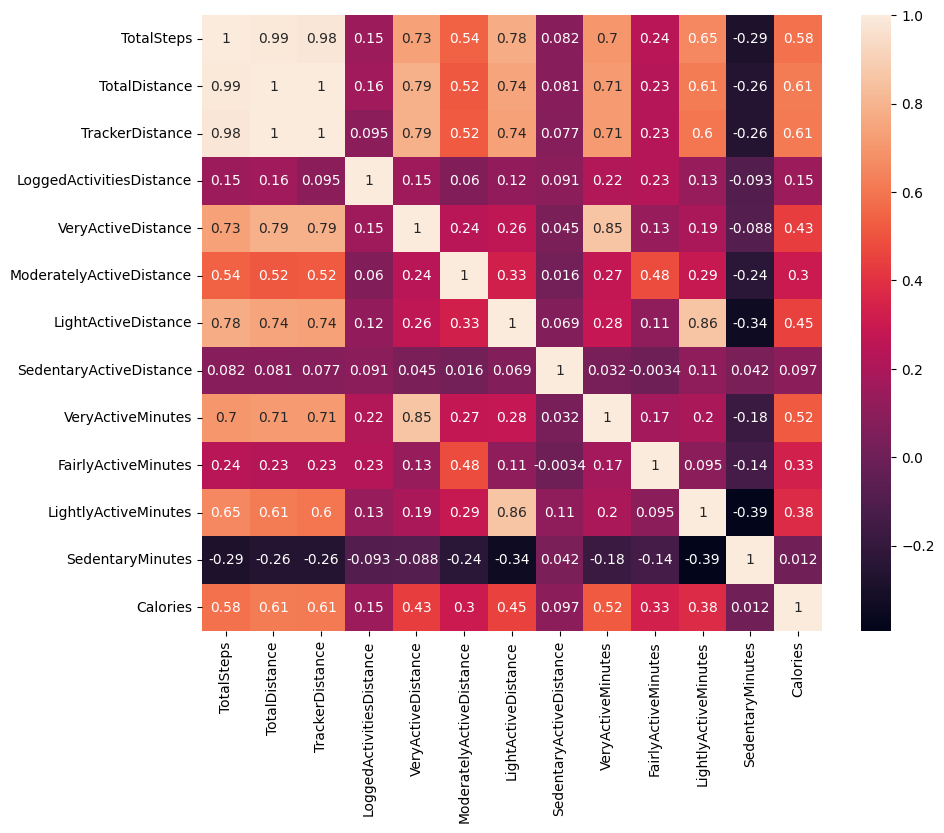

In [108]:
numerical_features = df[[column for column in df.columns if df[column].dtype != 'object']]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True)

In [109]:
df.drop(['TotalSteps','TrackerDistance'], axis=1, inplace=True)

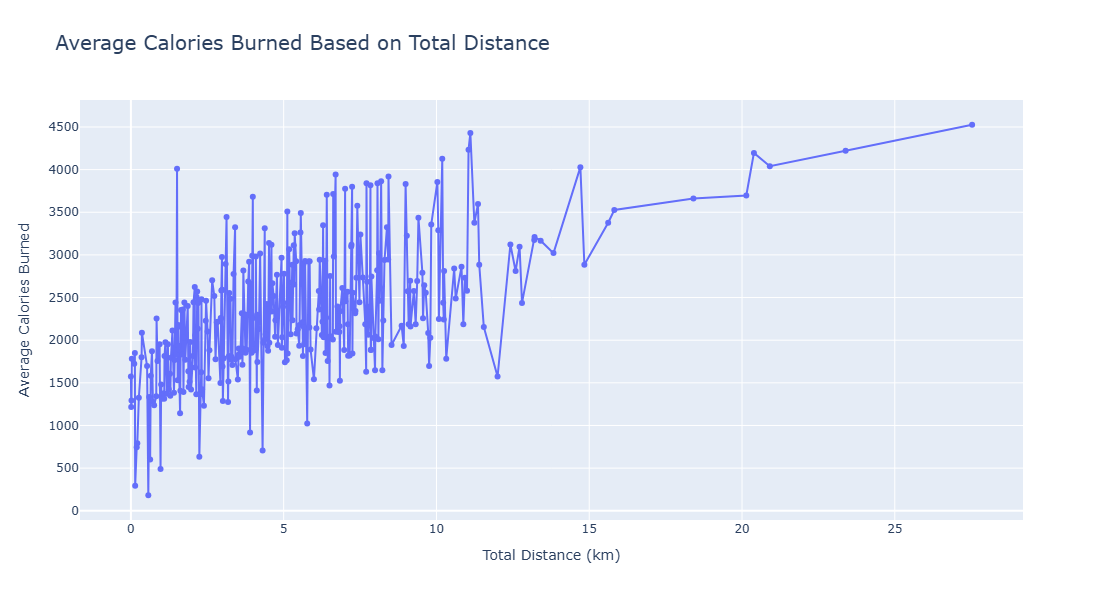

In [127]:
# Create the line plot using plotly
average_df = df.groupby('TotalDistance', as_index=False)['Calories'].mean()
fig = px.line(average_df, 
              x='TotalDistance', 
              y='Calories', 
              markers=True,  # Show individual points on the line
              title='Average Calories Burned Based on Total Distance',
              labels={'Total Distance': 'Total Distance (km)', 'Calories Burned': 'Average Calories Burned'})

# Customize the layout
fig.update_layout(
    width=1200, height=600,
    xaxis_title='Total Distance (km)',
    yaxis_title='Average Calories Burned',
    title_font_size=20,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)

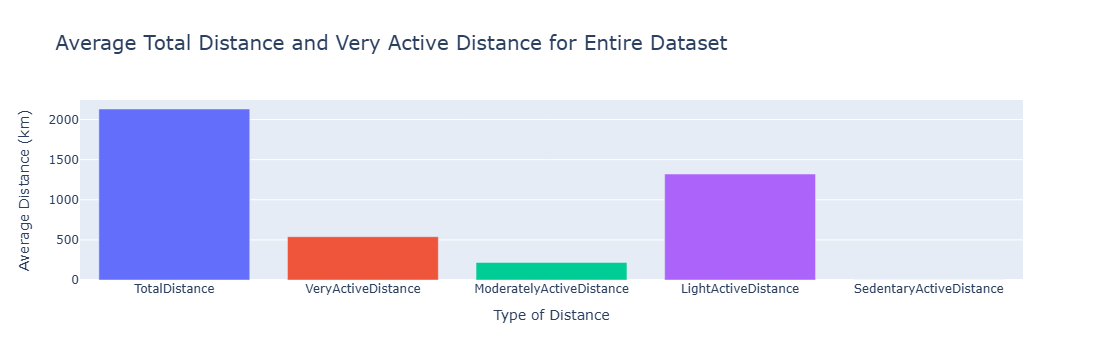

In [128]:
# Calculate the average Total Distance and Very Active Distance for the entire dataset
average_data = {
    'Distance Type': ['TotalDistance', 'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance'],
    'Average Distance': [
        df['TotalDistance'].sum(), 
        df['VeryActiveDistance'].sum(),
        df['ModeratelyActiveDistance'].sum(),
        df['LightActiveDistance'].sum(),
        df['SedentaryActiveDistance'].sum()
    ]
}

average_df = pd.DataFrame(average_data)

# Create the bar plot using plotly
fig = px.bar(average_df, 
             x='Distance Type', 
             y='Average Distance', 
             color='Distance Type',  # Use 'Distance Type' as the hue
             title='Average Total Distance and Very Active Distance for Entire Dataset',
             labels={'Distance Type': 'Type of Distance', 'Average Distance': 'Average Distance (km)'})

# Customize the layout
fig.update_layout(
    xaxis_title='Type of Distance',
    yaxis_title='Average Distance (km)',
    title_font_size=20,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    showlegend=False  # Hide the legend since the color is already indicating the distance type
)

# Show the plot
fig.show()

In [129]:
print(df['SedentaryActiveDistance'].sum())

0.8699999861419179


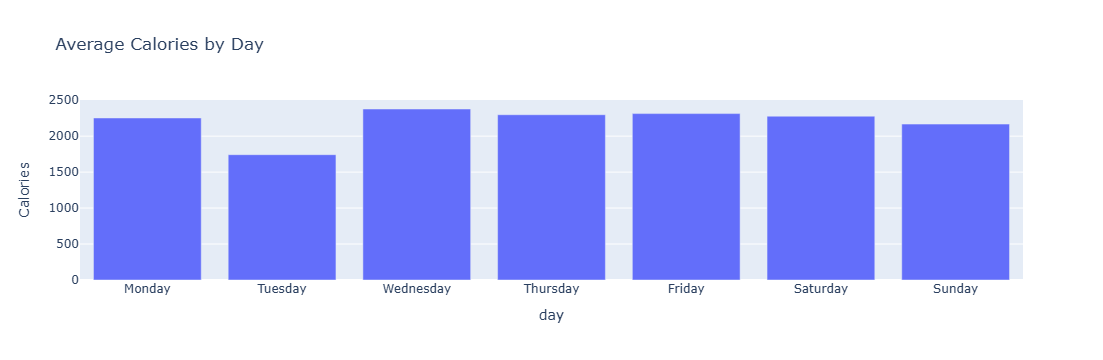

In [130]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = df.groupby('day')['Calories'].mean().reset_index()

fig = px.bar(df_day, x='day', y='Calories', title='Average Calories by Day',
            category_orders={'day': day_order})
fig.show()

<h1>Convert Categorical to Numerical Column</h1>

In [131]:
df = pd.get_dummies(df, columns=['day'], drop_first=True)
# Convert Boolean columns to integer
df = df.astype(int)

<h1>Model Building</h1>

In [132]:
# Prepare the features (X) and target (y)
X = df.drop('Calories', axis=1)  # Drop non-numeric and target columns
y = df['Calories']
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply Standardization to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h1>Testing and Evaluating the Model</h1>

In [133]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy (R² score) and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
df_comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Print the DataFrame
print(df_comparison)

R² Score: 0.6413861962540852
Mean Squared Error: 228503.33637036354
    Actual    Predicted
0     4430  4833.257152
1     4029  3411.517344
2     1820  1856.946970
3     1776  1823.378215
4     1630  2305.147489
..     ...          ...
87    1920  1820.796918
88    1515  1719.314308
89    1971  2001.207831
90    1490  2444.788195
91    1313  2046.257270

[92 rows x 2 columns]


<h1>Plotting Actual Vs Predicted Values</h1>

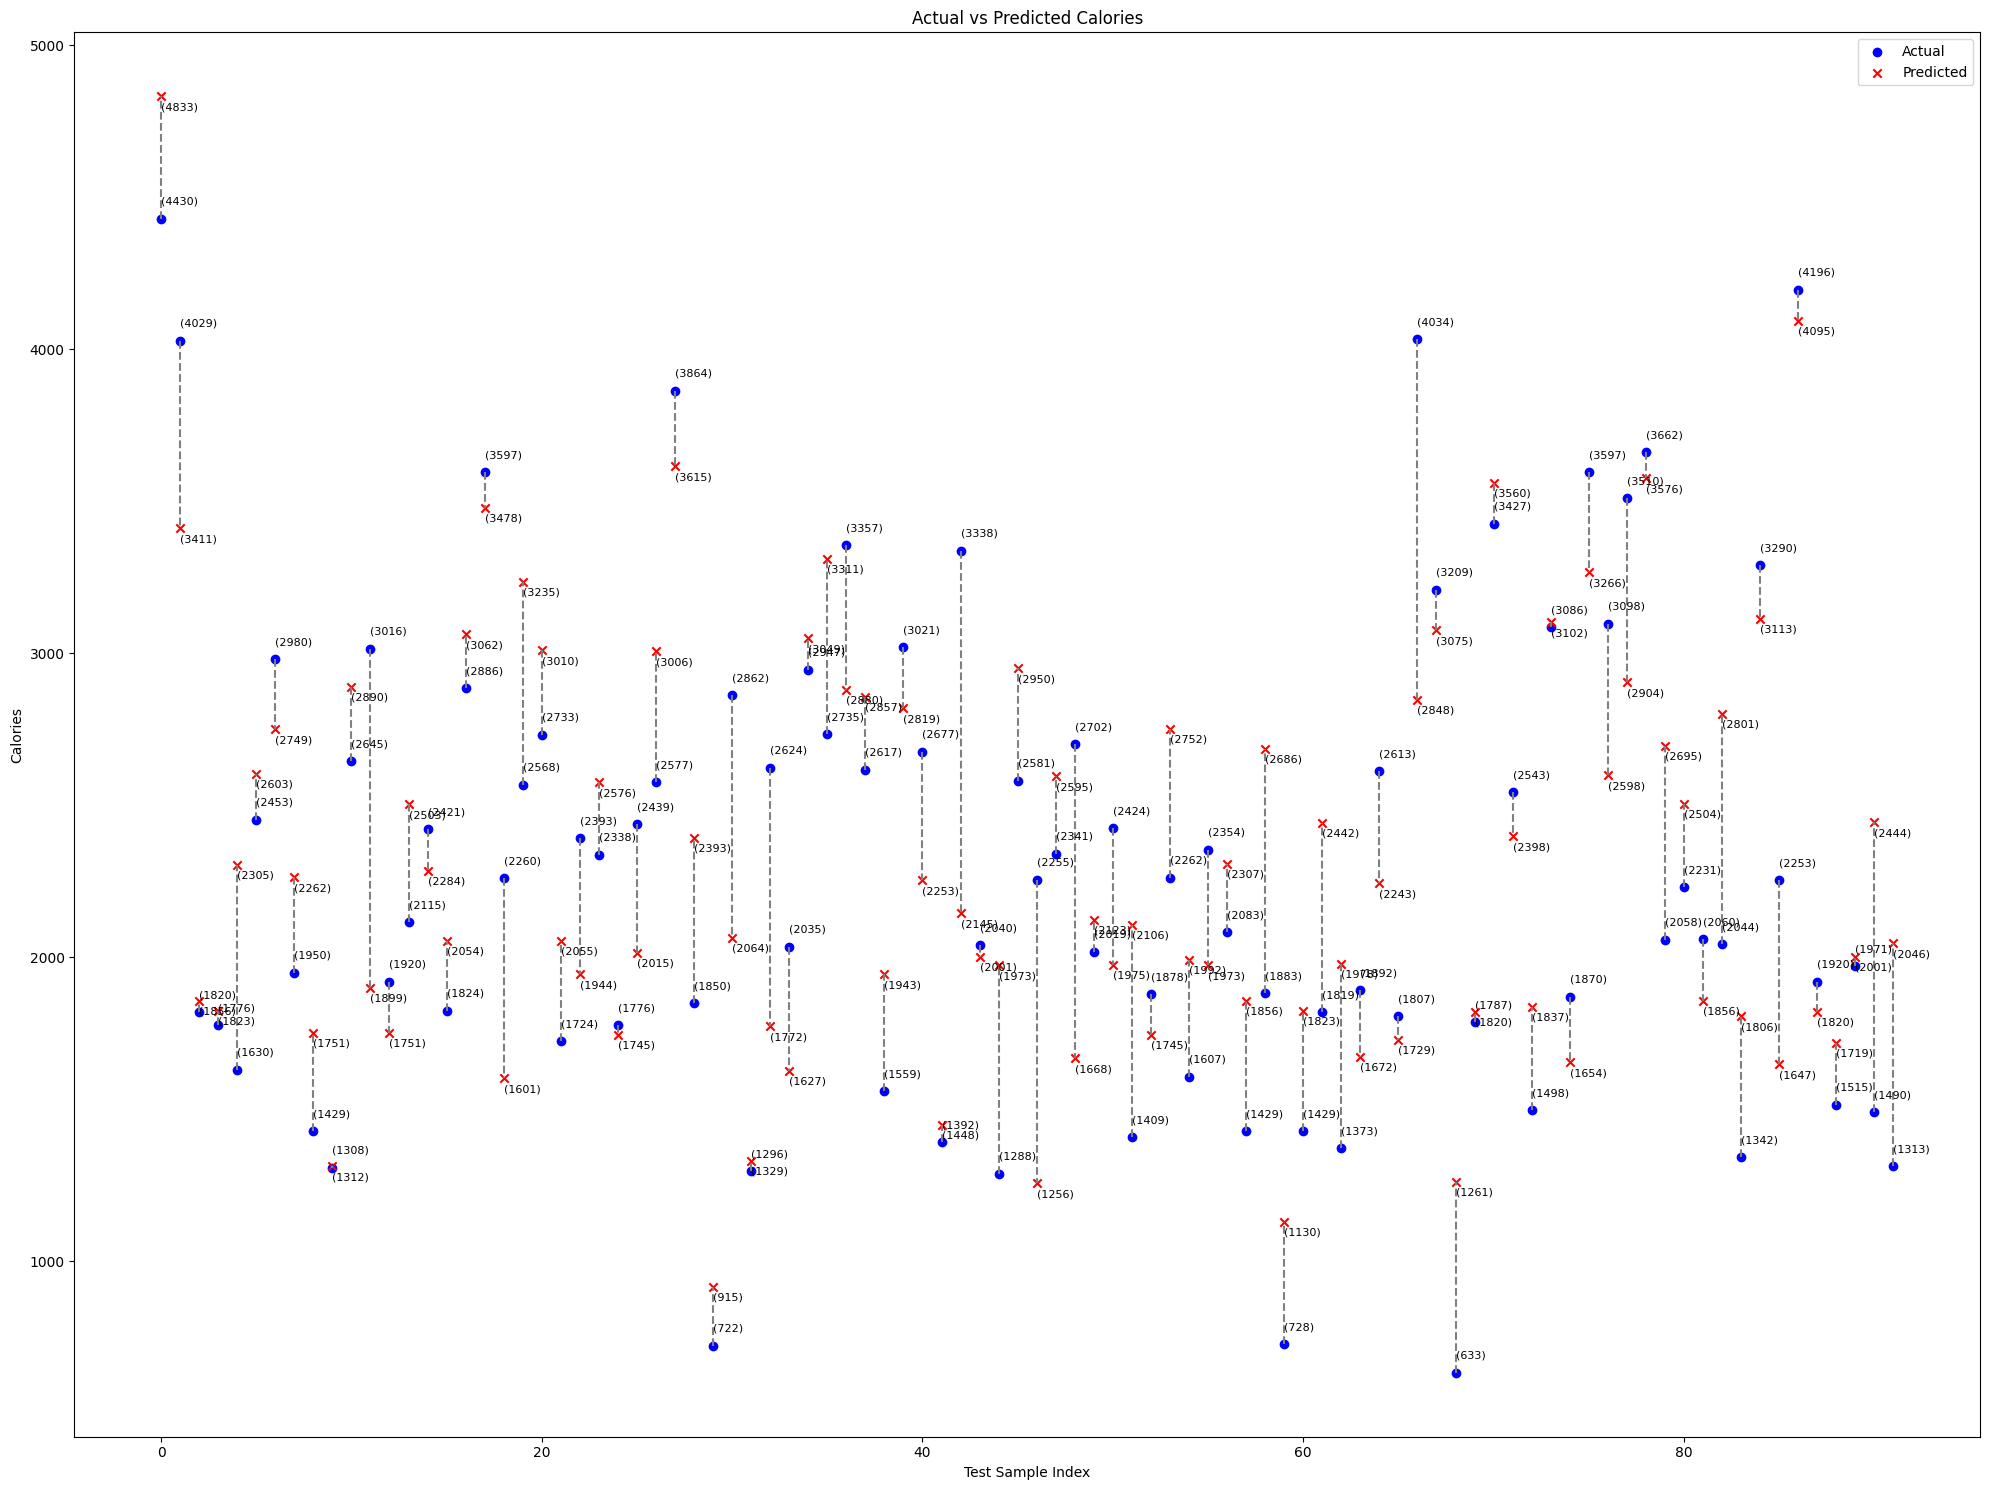

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (rest of your code)

# Plot Actual vs Predicted Calories
plt.figure(figsize=(20, 15))

for i, (actual, predicted) in enumerate(zip(y_test.values, y_pred)):
    plt.scatter(i, actual, color='b', marker='o', label='Actual' if i == 0 else '')
    plt.scatter(i, predicted, color='r', marker='x', label='Predicted' if i == 0 else '')
    plt.plot([i, i], [actual, predicted], linestyle='--', color='gray')  # Add dashed line

    # Annotate data points with values
    plt.annotate(f"({int(actual)})", xy=(i, actual), textcoords="offset points", xytext=(0, 10), fontsize=8)
    plt.annotate(f"({int(predicted)})", xy=(i, predicted), textcoords="offset points", xytext=(0, -10), fontsize=8)

plt.title('Actual vs Predicted Calories')
plt.xlabel('Test Sample Index')
plt.ylabel('Calories')
plt.legend()
plt.tight_layout()
plt.show()

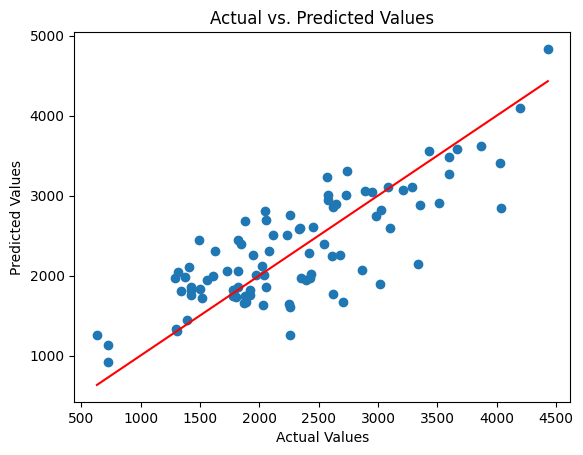

In [136]:
import matplotlib.pyplot as plt

# Assuming you have your actual values in y_test and predicted values in y_pred

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Add a 45-degree line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()

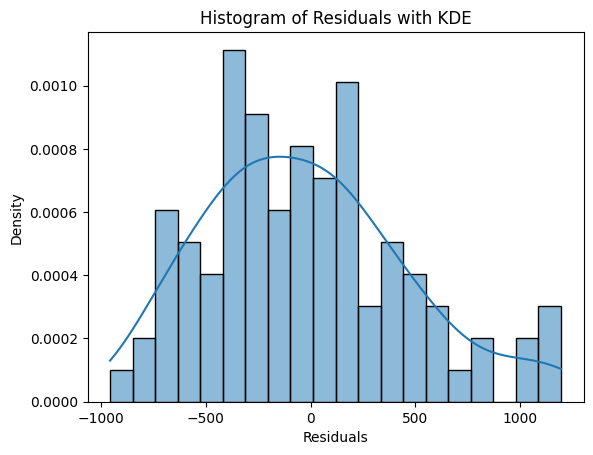

In [139]:
residuals = y_test - y_pred

# Create the plot
sns.histplot(residuals, kde=True, stat='density', bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with KDE")
plt.show()